In [20]:
"""
Created on Fri Dec 11 11:55:30 2020
使用支持向量机分类算法，根据身高和体重来判断是否为肥胖
肥胖的金标准为bmi > 28
@author: Li Chao
"""

# 导入相应的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import  LinearSVC

In [4]:
# 生成训练数据集
np.random.seed(666)
height_train = np.random.random(200) + 1 # 200个人的身高
weight_train = np.random.random(200)*100  # 200个人的体重
x_train = np.vstack([height_train, weight_train]).T  # 将身高和体重拼接成两列，即一个人2个特征
bmi_train = np.array(weight_train)/np.power(height_train,2)  # 计算BMI
y_train = np.int64(bmi_train > 28)  # BMI大于28为肥胖

# 生成测试集
np.random.seed(888)
height_test = np.random.random(100) + 1 # 100人的身高
weight_test = np.random.random(100)*100  # 100个人体重
x_test = np.vstack([height_test, weight_test]).T # 将身高和体重拼接成两列，即一个人2个特征
bmi_test = np.array(weight_test)/np.power(height_test,2)  # 计算BMI
y_test = np.int64(bmi_test > 28)  # BMI大于28为肥胖

# 查看训练集数据
x_train_ = pd.concat([pd.DataFrame(y_train), pd.DataFrame(x_train)], axis=1)
x_train_.columns = ["肥胖","身高","体重"]
x_train_.head(10)

,肥胖,身高,体重
0,0,1.700437,37.146278
1,0,1.844187,93.263398
2,1,1.676514,87.870934
3,0,1.727858,63.540289
4,0,1.951458,7.311182
5,1,1.012703,84.731036
6,1,1.413588,85.063229
7,1,1.048813,33.730248
8,1,1.099929,64.449643
9,1,1.508066,83.302610


In [21]:
# 训练模型： 直接使用sklearn封装好的SVM分类器
svm = LinearSVC(max_iter=1000)  # 实例化
svm.fit(x_train, y_train)  # 调用svm对象的fit方法

d:\my_codes\virtualenv_eslearn\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [25]:
# 测试
w = svm.coef_  # 获取模型的权重
b = svm.intercept_  # 获取模型的截距
pred_value = np.dot(x_test, w.T) + b  # 各个样本点的预测分数 y = w*x +b
print(pred_value)
print(w)
print(b)

y_pred = np.int64(pred_value > 0)  # 预测值大于0，即说明其为正类
y_pred = y_pred.reshape(-1,)  # Reshape, 将y_pred 变为1维度
acc = np.sum((y_pred-y_test)==0)/len(y_test)  # 计算准确度，即正确分类的比例
print(f"测试集的准确度={acc:.3f}")

[[-2.34492896]
 [-1.96130991]
 [-1.9061509 ]
 [-2.60871307]
 [-0.45753843]
 [-0.24887373]
 [-1.78186048]
 [-0.30108337]
 [-1.1728248 ]
 [-0.07614281]
 [-1.46860704]
 [ 0.02250168]
 [-1.05639011]
 [ 0.94526081]
 [-2.88480747]
 [-1.22703507]
 [-1.97295688]
 [-0.18967055]
 [-2.04498258]
 [-0.91818073]
 [-1.37988845]
 [ 0.78632118]
 [-1.59461571]
 [-2.92570177]
 [-0.66116856]
 [ 0.80024373]
 [ 0.18604465]
 [ 0.35433636]
 [ 0.18305941]
 [-1.48586484]
 [ 1.53168271]
 [-1.78208883]
 [-1.81066365]
 [-1.2604158 ]
 [-2.20195412]
 [-2.35222857]
 [ 0.71338109]
 [-0.7995299 ]
 [-0.50009453]
 [ 0.12723359]
 [-0.11288614]
 [ 0.86286304]
 [-2.5265782 ]
 [-1.31276448]
 [ 0.75349752]
 [ 1.37610289]
 [-0.16519678]
 [ 0.69866299]
 [-0.4304835 ]
 [-0.2041962 ]
 [-1.34793173]
 [-1.11130428]
 [ 0.14627957]
 [-2.2417498 ]
 [ 1.03739579]
 [-3.14380642]
 [-0.50236665]
 [-1.78069444]
 [-2.54711915]
 [ 0.4946215 ]
 [-1.19988378]
 [-0.9005808 ]
 [-2.26185079]
 [-2.26108328]
 [ 0.32881403]
 [-2.33220862]
 [-0.32765

In [14]:
data = np.random.randn(4,4)
print(data)
np.reshape(data,[-1,2])

[[-0.64834024  0.23271543 -0.92732847  1.0056563 ]
 [ 0.66105328  0.7233109  -0.54402224 -0.53700111]
 [ 0.69133885 -1.12059121 -0.97087181  0.34273636]
 [ 0.73938653 -0.53383597 -0.1141609  -0.68383012]]


array([[-0.64834024,  0.23271543],
       [-0.92732847,  1.0056563 ],
       [ 0.66105328,  0.7233109 ],
       [-0.54402224, -0.53700111],
       [ 0.69133885, -1.12059121],
       [-0.97087181,  0.34273636],
       [ 0.73938653, -0.53383597],
       [-0.1141609 , -0.68383012]])

d:\my_codes\virtualenv_eslearn\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


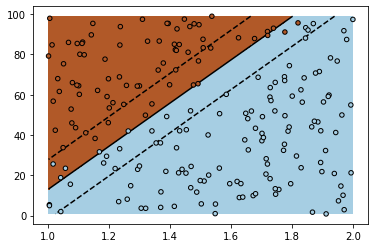

In [16]:
# 画出SVM分类情况
plt.figure()
plt.clf()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, zorder=500, cmap=plt.cm.Paired,
            edgecolor='k', s=20)

plt.axis('tight')
x_min = x_train[:, 0].min()
x_max = x_train[:, 0].max()
y_min = x_train[:, 1].min()
y_max = x_train[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.show()